In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICE'] = ''

import sys
import argparse
import random
from pathlib import Path
import json

import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import pytorch_lightning as pl

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data.base_data_module import BaseDataModule
from text_recognizer.data import IAMParagraphs
from text_recognizer.data.iam_paragraphs import resize_image, IMAGE_SCALE_FACTOR, get_transform
from text_recognizer.models import ResnetTransformer
from text_recognizer.lit_models import TransformerLitModel
from text_recognizer.paragraph_text_recognizer import ParagraphTextRecognizer
import text_recognizer.util as util

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def _plot(image, figsize=(12,12), title='', vmin=0, vmax=255):
    plt.figure(figsize=figsize)
    if title:
        plt.title(title)
    plt.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)

In [3]:
PARA_PROCESSED_DATA_DIRNAME = BaseDataModule.data_dirname() / "processed" / "iam_paragraphs"
PARA_PROCESSED_DATA_DIRNAME.exists()

True

In [4]:
text_recog = ParagraphTextRecognizer()

Global seed set to 42


### Prediction on trainval samples

In [5]:
trainval_para_filenames = list((PARA_PROCESSED_DATA_DIRNAME / 'trainval').glob('*.png'))
len(trainval_para_filenames)

1308

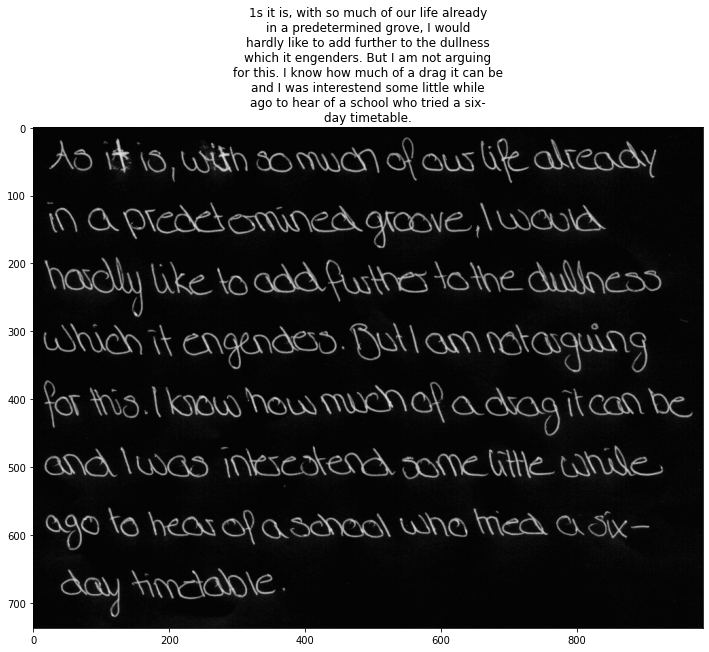

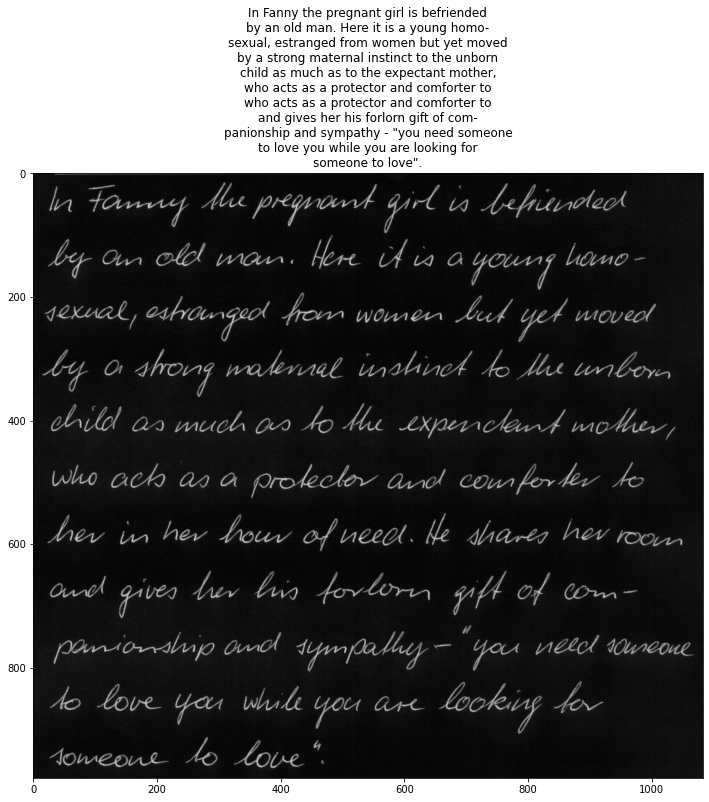

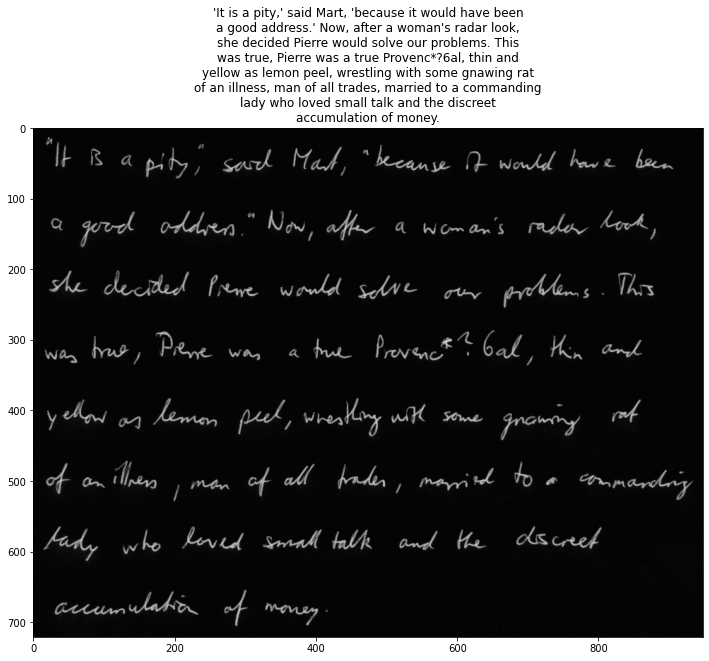

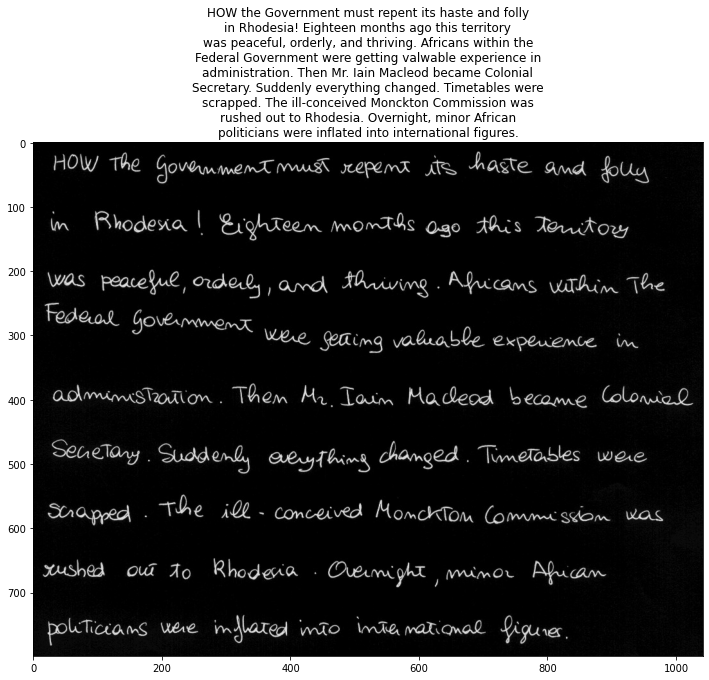

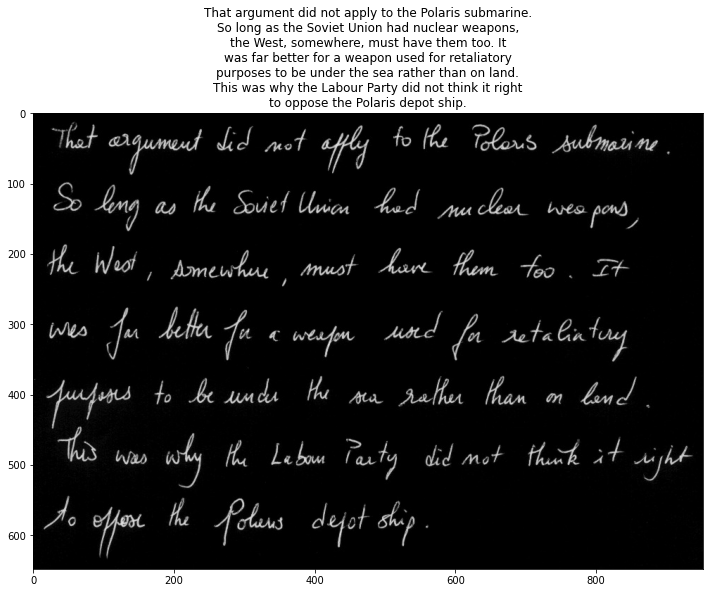

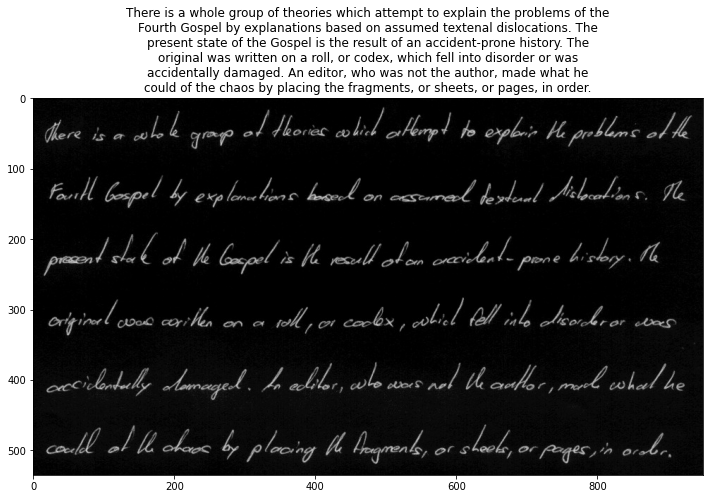

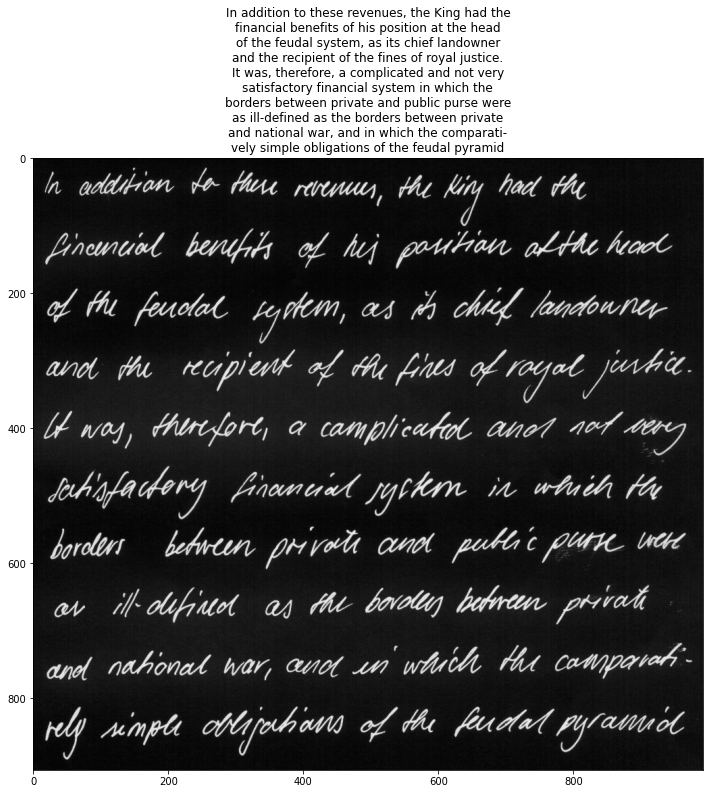

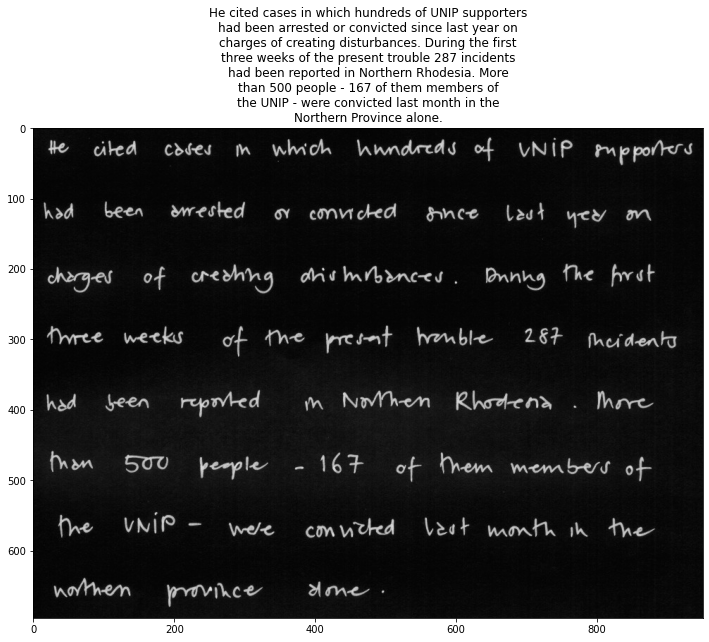

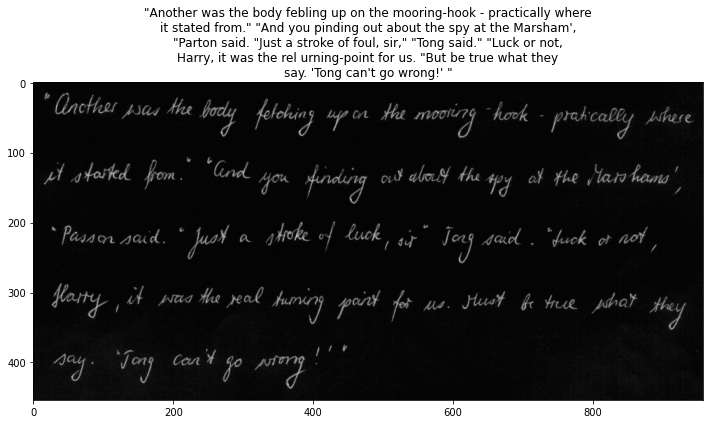

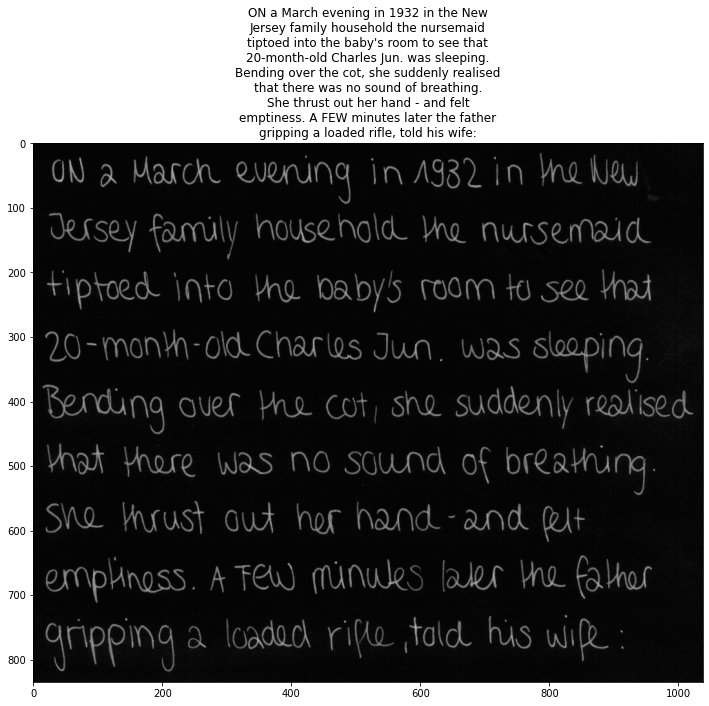

In [6]:
for _ in range(10):
    img_filename = random.choice(trainval_para_filenames)
    pred_str = text_recog.predict(img_filename)
    
    pil_img = util.read_image_pil(img_filename, grayscale=True)
    _plot(np.array(pil_img), title=pred_str)

### Prediction on test samples

In [7]:
test_para_filenames = list((PARA_PROCESSED_DATA_DIRNAME / 'test').glob('*.png'))
len(test_para_filenames)

231

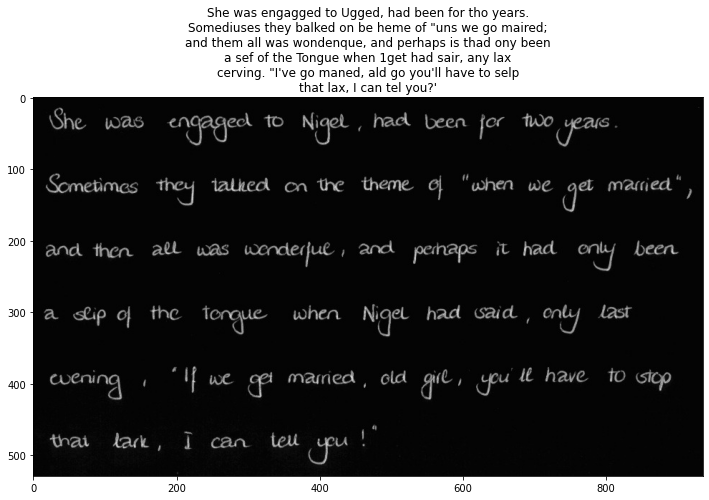

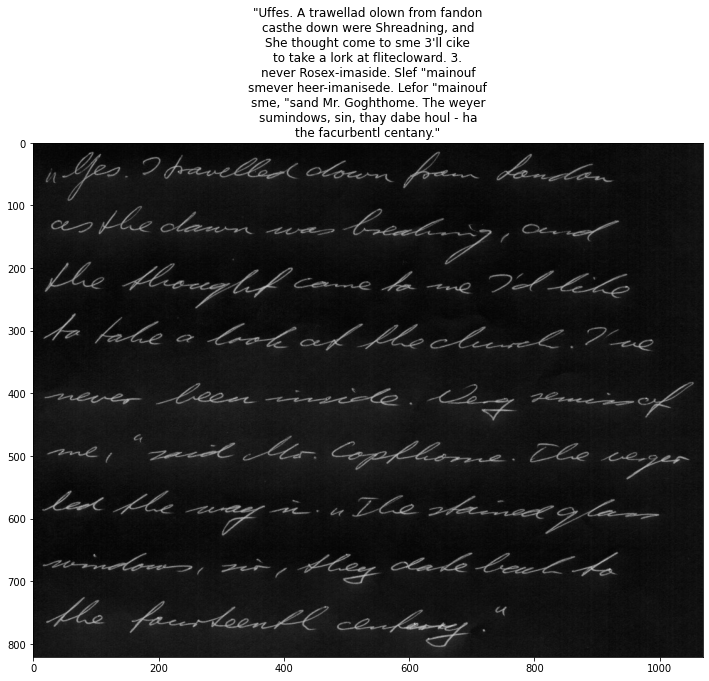

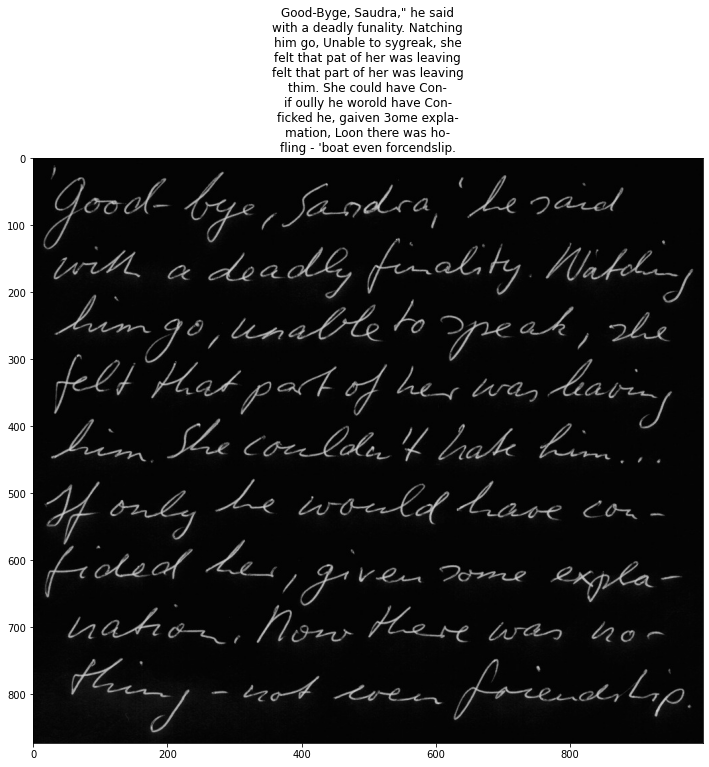

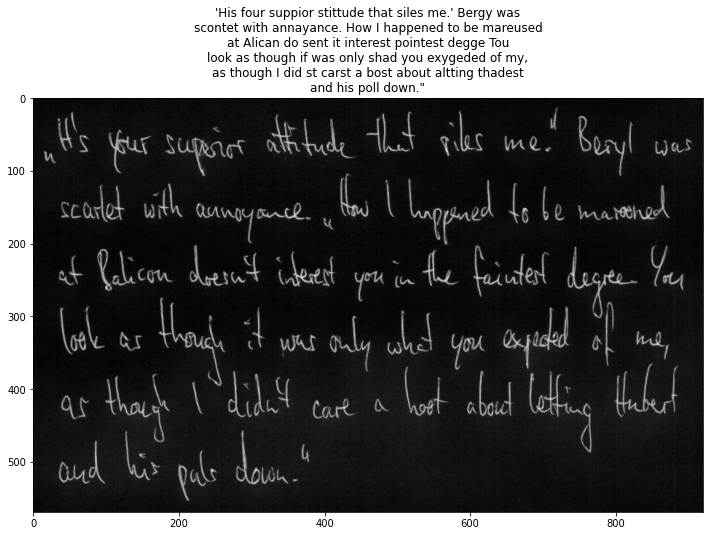

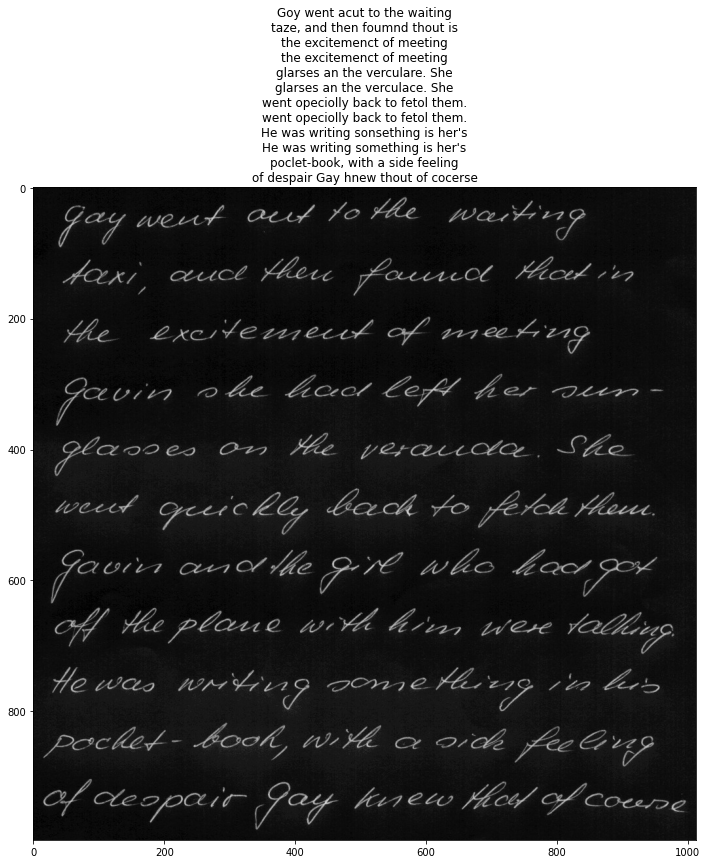

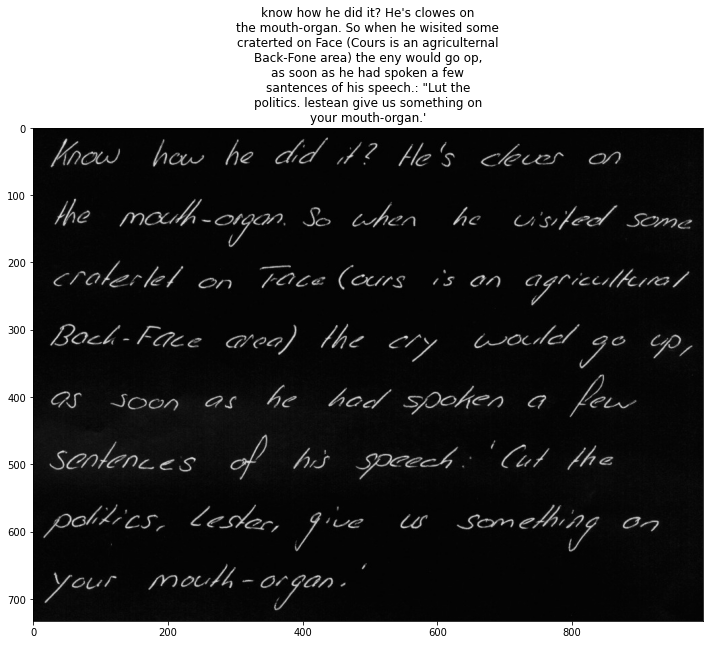

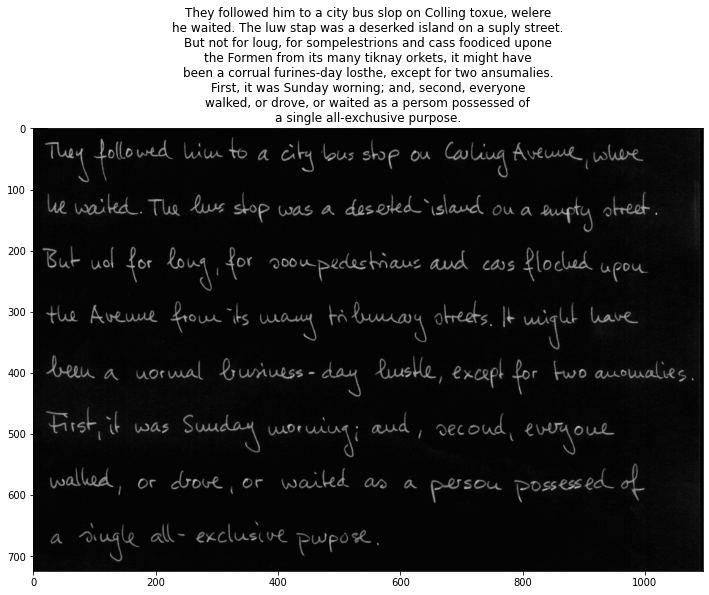

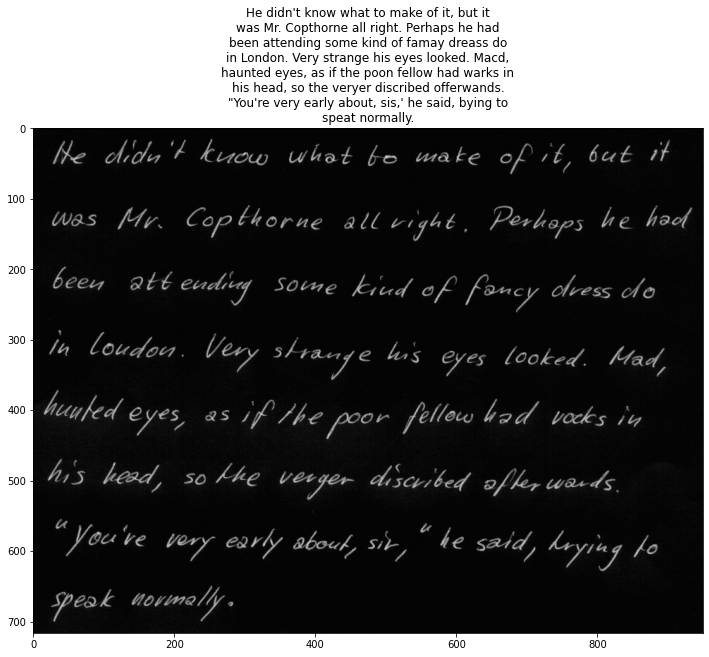

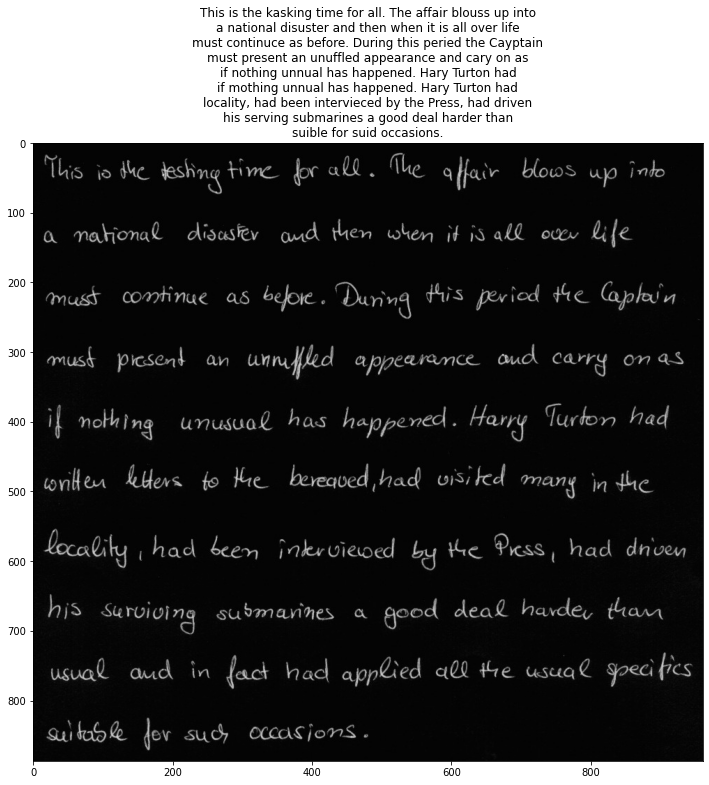

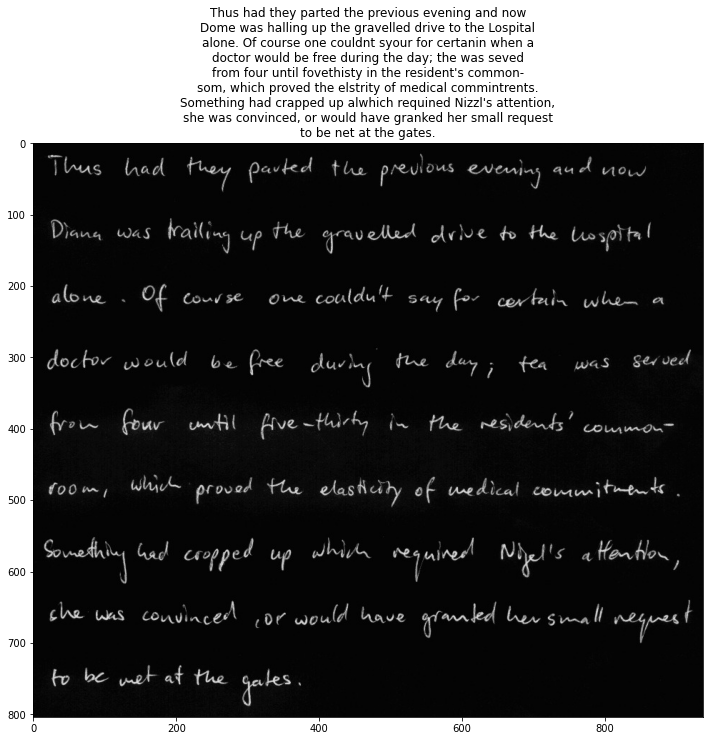

In [8]:
for _ in range(10):
    img_filename = random.choice(test_para_filenames)
    pred_str = text_recog.predict(img_filename)
    pil_img = util.read_image_pil(img_filename, grayscale=True)
    _plot(np.array(pil_img), title=pred_str)

### Checking if consecutive prediction calls give the same output

In [10]:
img_filename, pred_str

(PosixPath('/home/saurabh/dev/fsdl-text-recognizer-2021/data/processed/iam_paragraphs/test/p03-185.png'),
 "Thus had they parted the previous evening and now\nDome was halling up the gravelled drive to the Lospital\nalone. Of course one couldnt syour for certanin when a\ndoctor would be free during the day; the was seved\nfrom four until fovethisty in the resident's common-\nsom, which proved the elstrity of medical commintrents.\nSomething had crapped up alwhich requined Nizzl's attention,\nshe was convinced, or would have granked her small request\nto be net at the gates.")

In [12]:
pred_str_1 = text_recog.predict(img_filename)
pred_str_2 = text_recog.predict(img_filename)

In [14]:
pred_str == pred_str_1, \
pred_str == pred_str_2

(True, True)